## Imports 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get and Filter data


In [38]:
def get_data(url):
  df = pd.read_csv(url, low_memory=False)
  print("data.shape : ", df.shape)
  return df
  
#get_data form url 
url = 'https://files.data.gouv.fr/geo-dvf/latest/csv/2020/full.csv.gz'
df = get_data(url)
# make copies
whole_data = df.copy()

def drop_rows_with_nan_in_column(df, col_name): #df : dataframe
  selected_rows = data[data[col_name].notna()]
  return selected_rows

data_clean = drop_rows_with_nan_in_column(df = whole_data, col_name= 'valeur_fonciere')
print("data_clean", data_clean.shape, "whole_data", whole_data.shape)


def filtered_data(df, col_mutation, col_local_type):
  
  modif_df = df[
                (df[col_mutation] == "Vente") & \
                 (   \
                  (df[col_local_type] == "Maison") | 
                   (df[col_local_type] == "Appartement") | 
                  (df[col_local_type] == "Dépendance")
                 )
                 ] 

  return modif_df                                
 
data = filtered_data(df = data_clean, 
                           col_mutation = 'nature_mutation',
                           col_local_type = 'type_local')                          

print("data.shape (whole)", whole_data.shape) # whole data
print("data_clean.shape", data_clean.shape) # NaN 'valeur_fonciere' out

print("data.shape (industrial out, NaN local type out, and only 'vente'mutation ", data.shape)


#whole_data : indutrial local type included
#data : indutrial local type out & (nature_mutation = 'vente)

data.shape :  (2459560, 40)
data_clean (1203720, 40) whole_data (2459560, 40)
data.shape (whole) (2459560, 40)
data_clean.shape (1203720, 40)
data.shape (industrial out, NaN local type out, and only 'vente'mutation  (1203720, 40)


## Column : code_nature_culture

In [39]:
data['code_nature_culture'].unique()

array(['S', nan, 'J', 'AG', 'BS', 'P', 'T', 'VE', 'AB', 'VI', 'E', 'BP',
       'BT', 'L', 'PA', 'BF', 'BR', 'CH', 'B', 'CA', 'PP', 'PC', 'BM',
       'TP', 'PE', 'PH', 'BO', 'LB'], dtype=object)

In [40]:
data['code_nature_culture'].value_counts()[:3]

S     550294
AG     37191
J      28394
Name: code_nature_culture, dtype: int64

###Missing values

In [41]:
data['code_nature_culture'].isnull().sum()

547986

In [42]:
data['code_nature_culture'].isnull().sum() / len(data)

0.45524374439238363

## Column : nature_culture

In [43]:
data['nature_culture'].unique()

array(['sols', nan, 'jardins', "terrains d'agrément",
       'taillis sous futaie', 'prés', 'terres', 'vergers',
       'terrains a bâtir', 'vignes', 'eaux', 'peupleraies',
       'taillis simples', 'landes', 'pâtures', 'futaies feuillues',
       'futaies résineuses', 'chemin de fer', 'bois', 'carrières',
       'prés plantes', 'pacages', 'futaies mixtes', 'terres plantées',
       "prés d'embouche", 'herbages', 'oseraies', 'landes boisées'],
      dtype=object)

In [44]:
data['nature_culture'].value_counts()[:3]#Check count of each category

sols                   550294
terrains d'agrément     37191
jardins                 28394
Name: nature_culture, dtype: int64

###Missing values

In [45]:
data['nature_culture'].isnull().sum()

547986

##Column : nature_culture_speciale

In [46]:
len(data['nature_culture_speciale'].unique())

90

In [47]:
data['nature_culture_speciale'].value_counts()[:3]#Check count of each category

Jardin potager                       8863
Parc                                 5553
Dépendances d'ensemble immobilier     676
Name: nature_culture_speciale, dtype: int64

###Missing values

In [48]:
data['nature_culture_speciale'].isnull().sum()

1183874

In [49]:
data['nature_culture_speciale'].isnull().sum() / len(data)

0.9835127770577875

#Column : code_nature_culture_speciale

In [50]:
len(data['code_nature_culture_speciale'].unique())

90

In [51]:
data['code_nature_culture_speciale'].value_counts()[:3]#Check count of each category

POTAG    8863
PARC     5553
IMM       676
Name: code_nature_culture_speciale, dtype: int64

###Missing values

In [52]:
data['code_nature_culture_speciale'].isnull().sum()

1183874

# Select rows with NaN in 'code_nature_culture' && 'code_nature_culture_speciale'

In [53]:
def select_rows_with_nan_in_list_columns(df, col_name): #df : dataframe
  selected_rows = df[
                     df[col_name[0]].isnull() & \
                     df[col_name[1]].isnull() 
                     ]
  return selected_rows


df_test = select_rows_with_nan_in_list_columns(df = data,
                                         col_name= ['code_nature_culture', 'code_nature_culture_speciale'])
df_test.shape


(547986, 40)

In [54]:
len(data) - len(df_test) # len of data with one of both colums : 
# 'code_nature_culture', 'code_nature_culture_speciale'
#is NaN

655734

In [55]:
mask_columns = ['code_nature_culture',
                'code_nature_culture_speciale',
                'valeur_fonciere']

df_test[mask_columns]

,code_nature_culture,code_nature_culture_speciale,valeur_fonciere
14,NaN,NaN,54800.0
24,NaN,NaN,97000.0
34,NaN,NaN,96000.0
35,NaN,NaN,96000.0
47,NaN,NaN,99000.0
...,...,...,...
2459537,NaN,NaN,1.0
2459538,NaN,NaN,1.0
2459539,NaN,NaN,355000.0
2459540,NaN,NaN,151000.0


# Drop rows with NaN in 'code_nature_culture' && 'code_nature_culture_speciale'

In [56]:
def drop_rows_with_nan_in_list_columns(df, col_name): #df : dataframe

  mod_df = df.dropna( how='all', subset=col_name)
  
  return mod_df


data_nature_clean = drop_rows_with_nan_in_list_columns(df = data,
                          col_name= ['code_nature_culture', \
                                     'code_nature_culture_speciale'])
data_nature_clean.shape


(655734, 40)

In [57]:
mask_columns = ['type_local', 'code_nature_culture', 'nature_culture',
                'code_nature_culture_speciale',
                'valeur_fonciere']

data_nature_clean[mask_columns]

,type_local,code_nature_culture,nature_culture,code_nature_culture_speciale,valeur_fonciere
11,Maison,S,sols,NaN,72000.0
13,Maison,S,sols,NaN,180300.0
16,Maison,J,jardins,NaN,350750.0
17,Maison,S,sols,NaN,350750.0
18,Dépendance,S,sols,NaN,350750.0
...,...,...,...,...,...
2459554,Appartement,S,sols,NaN,1937500.0
2459555,Appartement,S,sols,NaN,1937500.0
2459556,Dépendance,S,sols,NaN,1937500.0
2459557,Appartement,S,sols,NaN,1937500.0


In [58]:
data_nature_clean['code_nature_culture'].isnull().sum()

0

In [59]:
data_nature_clean['code_nature_culture_speciale'].isnull().sum()

635888

#Corelations with target column : valeur_fonciere

Correlations: Check correlation between variable :

*   code_nature_culture

and
*  target variable : valeur_fonciere.



is there correlation between this variable and 'valeur_fonciere' ?

In [60]:
mask_columns = ['code_nature_culture', 
                'valeur_fonciere']

selected_data = data_nature_clean[mask_columns]
selected_data.head(2)

,code_nature_culture,valeur_fonciere
11,S,72000.0
13,S,180300.0


## Convert categorical variable color_head into dummy variables:

In [61]:
df_dummies = pd.get_dummies(selected_data['code_nature_culture'])

In [62]:
df_dummies.shape

(655734, 27)

In [63]:
df_new = pd.concat([selected_data, df_dummies], axis=1)
del df_new['code_nature_culture']
df_new.shape

(655734, 28)

In [64]:
df_new.head(2)

,valeur_fonciere,AB,AG,B,BF,BM,BO,BP,BR,BS,BT,CA,CH,E,J,L,LB,P,PA,PC,PE,PH,PP,S,T,TP,VE,VI
11,72000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
13,180300.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [65]:
df_new['valeur_fonciere'].isnull().sum()

0

In [66]:
#Put that in numpy array:
x = df_new.values
x.shape

(655734, 28)

In [67]:
#Compute the correlation:

correlation_matrix = np.corrcoef(x.T)
print(type(correlation_matrix))

<class 'numpy.ndarray'>


In [68]:
correlation_matrix.shape

(28, 28)

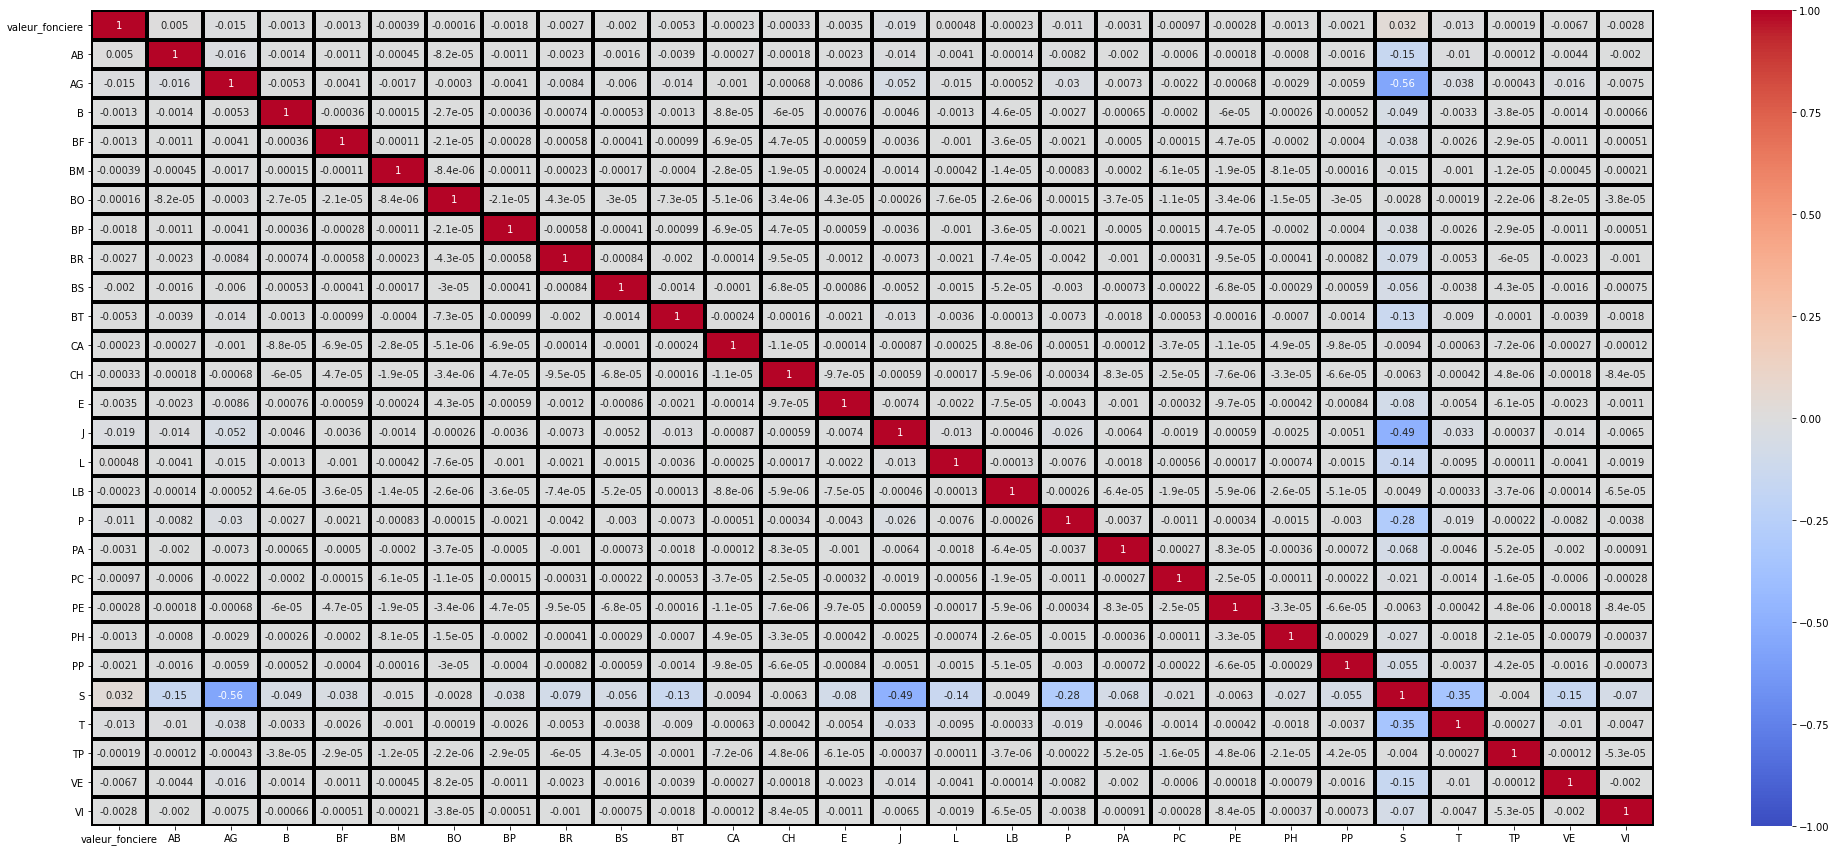

In [74]:
plt.figure(figsize=(35,15))

sns.heatmap(df_new.corr(), annot = True,vmin=-1, vmax=1,
            center= 0,cmap= 'coolwarm',linewidths=3, linecolor='black')